PART 1: Import necessary libraries and
Web-scapping to get the necessary data

In [137]:
#libraries
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


dataset_id = "fhrw-4uyv"
# Select specific columns, filter for Brooklyn, limit to 1000
params = {
    "$select": "created_date, complaint_type, borough, descriptor",
    "$where": "complaint_type='Noise'", #narrow down to Noise alone
    "$limit": 1000, #retrieve only 1000 rows
    "$order": "created_date DESC"
}

url = f"https://data.cityofnewyork.us/resource/{dataset_id}.json"

try:
    response = requests.get(url, params=params)
    response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)
    data = response.json() # Parse the JSON response into a Python list/dict
    print(json.dumps(data, indent=2)) # Pretty print the JSON

except requests.exceptions.RequestException as e:
    print(f"Error making API request: {e}")
except json.JSONDecodeError:
    print(f"Error decoding JSON response: {response.text}")



[
  {
    "created_date": "2025-05-02T23:23:00.000",
    "complaint_type": "Noise",
    "borough": "MANHATTAN",
    "descriptor": "Noise, Barking Dog (NR5)"
  },
  {
    "created_date": "2025-05-02T23:17:00.000",
    "complaint_type": "Noise",
    "borough": "BRONX",
    "descriptor": "Noise: Boat(Engine,Music,Etc) (NR10)"
  },
  {
    "created_date": "2025-05-02T23:11:00.000",
    "complaint_type": "Noise",
    "borough": "MANHATTAN",
    "descriptor": "Noise: Construction Before/After Hours (NM1)"
  },
  {
    "created_date": "2025-05-02T23:02:00.000",
    "complaint_type": "Noise",
    "borough": "QUEENS",
    "descriptor": "Noise, Barking Dog (NR5)"
  },
  {
    "created_date": "2025-05-02T22:59:00.000",
    "complaint_type": "Noise",
    "borough": "QUEENS",
    "descriptor": "Noise, Barking Dog (NR5)"
  },
  {
    "created_date": "2025-05-02T22:53:00.000",
    "complaint_type": "Noise",
    "borough": "BROOKLYN",
    "descriptor": "Noise: air condition/ventilation equipment (NV1)

In [138]:
df = pd.json_normalize(data)
df.head(5)

,created_date,complaint_type,borough,descriptor
0,2025-05-02T23:23:00.000,Noise,MANHATTAN,"Noise, Barking Dog (NR5)"
1,2025-05-02T23:17:00.000,Noise,BRONX,"Noise: Boat(Engine,Music,Etc) (NR10)"
2,2025-05-02T23:11:00.000,Noise,MANHATTAN,Noise: Construction Before/After Hours (NM1)
3,2025-05-02T23:02:00.000,Noise,QUEENS,"Noise, Barking Dog (NR5)"
4,2025-05-02T22:59:00.000,Noise,QUEENS,"Noise, Barking Dog (NR5)"


PART 2: Data Exploration

In [139]:
df.head() #top 5 rows of our data

,created_date,complaint_type,borough,descriptor
0,2025-05-02T23:23:00.000,Noise,MANHATTAN,"Noise, Barking Dog (NR5)"
1,2025-05-02T23:17:00.000,Noise,BRONX,"Noise: Boat(Engine,Music,Etc) (NR10)"
2,2025-05-02T23:11:00.000,Noise,MANHATTAN,Noise: Construction Before/After Hours (NM1)
3,2025-05-02T23:02:00.000,Noise,QUEENS,"Noise, Barking Dog (NR5)"
4,2025-05-02T22:59:00.000,Noise,QUEENS,"Noise, Barking Dog (NR5)"


In [140]:
df.tail() #last 5 rows of the data

,created_date,complaint_type,borough,descriptor
995,2025-04-27T10:08:00.000,Noise,BRONX,Noise: Alarms (NR3)
996,2025-04-27T10:05:00.000,Noise,MANHATTAN,Noise: Construction Equipment (NC1)
997,2025-04-27T10:02:00.000,Noise,BROOKLYN,Noise: Construction Before/After Hours (NM1)
998,2025-04-27T10:02:00.000,Noise,MANHATTAN,Noise: Construction Before/After Hours (NM1)
999,2025-04-27T09:59:00.000,Noise,BROOKLYN,"Noise, Barking Dog (NR5)"


Number of Rows and Columns explored, respectively

In [141]:
df.shape

(1000, 4)

In [142]:
df.info() #all object data-types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_date    1000 non-null   object
 1   complaint_type  1000 non-null   object
 2   borough         1000 non-null   object
 3   descriptor      1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [143]:
df.isnull().sum() #fortunately,no missing values to handle

,0
created_date,0
complaint_type,0
borough,0
descriptor,0


In [144]:
df.duplicated().sum() #Note, with 1000 rows of variable counts it is likely that some numbers repeat and 30 did in this case
#This is not high enough to raise a red flag (3% repeated number)

np.int64(30)

In [145]:
deplicated_rows = df[df.duplicated()]
deplicated_rows

,created_date,complaint_type,borough,descriptor
18,2025-05-02T21:23:00.000,Noise,QUEENS,Noise: Construction Before/After Hours (NM1)
20,2025-05-02T21:20:00.000,Noise,QUEENS,Noise: Construction Before/After Hours (NM1)
108,2025-05-02T09:29:00.000,Noise,MANHATTAN,Noise: Construction Equipment (NC1)
167,2025-05-01T23:11:00.000,Noise,MANHATTAN,Noise: Construction Before/After Hours (NM1)
170,2025-05-01T23:05:00.000,Noise,MANHATTAN,Noise: Construction Before/After Hours (NM1)
171,2025-05-01T23:05:00.000,Noise,MANHATTAN,Noise: Construction Before/After Hours (NM1)
173,2025-05-01T23:02:00.000,Noise,MANHATTAN,Noise: Construction Before/After Hours (NM1)
175,2025-05-01T22:56:00.000,Noise,MANHATTAN,Noise: Construction Before/After Hours (NM1)
177,2025-05-01T22:53:00.000,Noise,MANHATTAN,Noise: Construction Before/After Hours (NM1)
179,2025-05-01T22:50:00.000,Noise,MANHATTAN,Noise: Construction Before/After Hours (NM1)


Insight summary: Top 3 types of Noise complaints from the descriptor field are:
1. Construction before/after hours (NM1) with 353 complaints,
2. Barking Dog (NR5) with 180 complaits and
3. Construction Equipment (NC1) with 157 complaints, respectively

In [146]:
top_3_noise_complaints = df['descriptor'].value_counts().head(3)
top_3_noise_complaints

,count
descriptor,
Noise: Construction Before/After Hours (NM1),353
"Noise, Barking Dog (NR5)",180
Noise: Construction Equipment (NC1),157


PART 3: Generated Insights

Insight: Manhattan has the highest noise complaints of 353 counts in the last 30 days due to Construction before/after hours.

In [147]:
top_noise_borough = df.groupby('borough')['descriptor'].value_counts().idxmax()
top_noise_borough

('MANHATTAN', 'Noise: Construction Before/After Hours (NM1)')

Insight: Construction noise is the most common noise complait particularly in Manhattan as well as Brooklyn.

Also, The sound of barking dogs is predominant in areas such as Brooklyn due to how highly residential it is.

Finally, Staten Island has the average least noise complaints because it is more suburban than the rest of the boroughs and known for its family friendly neighbourhood and less crowded.

In [148]:
descriptor_by_borough = df.groupby(['borough', 'descriptor']).size().unstack(fill_value=0)
descriptor_by_borough


descriptor,"Noise, Barking Dog (NR5)","Noise, Ice Cream Truck (NR4)","Noise, Other Animals (NR6)",Noise: lawn care equipment (NCL),Noise: Alarms (NR3),"Noise: Boat(Engine,Music,Etc) (NR10)",Noise: Construction Before/After Hours (NM1),Noise: Construction Equipment (NC1),Noise: Jack Hammering (NC2),Noise: Manufacturing Noise (NK1),Noise: Private Carting Noise (NQ1),Noise: air condition/ventilation equipment (NV1)
borough,,,,,,,,,,,,
BRONX,17,10,1,5,10,1,23,13,3,1,2,10
BROOKLYN,55,12,5,8,29,2,105,64,19,3,4,22
MANHATTAN,40,18,0,3,17,0,161,57,20,0,5,37
QUEENS,51,4,0,1,11,2,53,19,9,2,2,11
STATEN ISLAND,17,4,0,7,5,0,11,4,1,0,0,4


In [149]:
top_descriptor_per_borough = descriptor_by_borough.idxmax(axis=1)
top_descriptor_per_borough


,0
borough,
BRONX,Noise: Construction Before/After Hours (NM1)
BROOKLYN,Noise: Construction Before/After Hours (NM1)
MANHATTAN,Noise: Construction Before/After Hours (NM1)
QUEENS,Noise: Construction Before/After Hours (NM1)
STATEN ISLAND,"Noise, Barking Dog (NR5)"


In [150]:
noise_complaints_per_borough = df['borough'].value_counts()
noise_complaints_per_borough

,count
borough,
MANHATTAN,358
BROOKLYN,328
QUEENS,165
BRONX,96
STATEN ISLAND,53


PART 4: Building Visualizations

Bar chart showing the number of noise complaint per borough

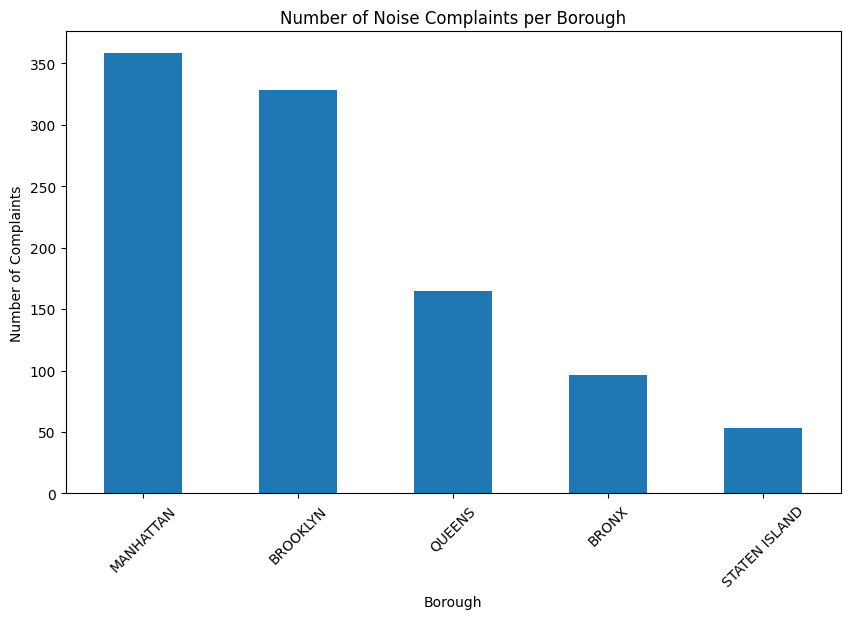

In [151]:
noise_complaints_per_borough.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Noise Complaints per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()


A comparison of different boroughs and the level of noise complaints they have gotten in the last 30 days in descending order.

Horizontal bar chart showing the top 5 noise complaint descriptors

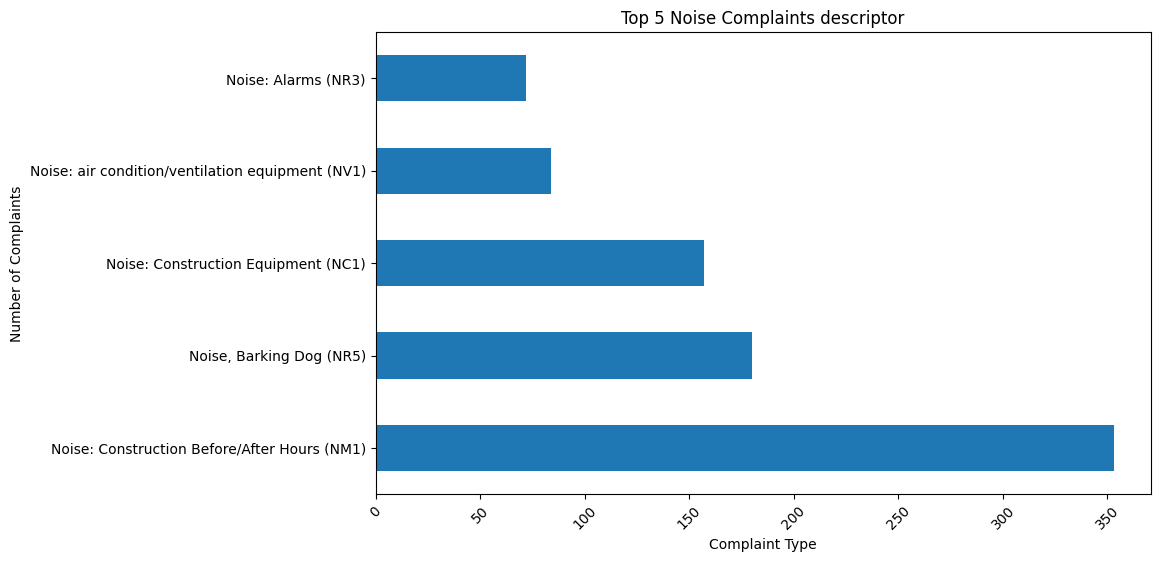

In [152]:
top_5_noise_complaints = df['descriptor'].value_counts().head(5)
top_5_noise_complaints.plot(kind='barh', figsize=(10, 6))
plt.title('Top 5 Noise Complaints descriptor')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()


Visualization of different categories of noise complaints and the amount of complaints for the past 30 days.

Borough Versus Descriptor Heatmap

Also, Staten Island shows less intensity with regards to noise complaints by most descriptors

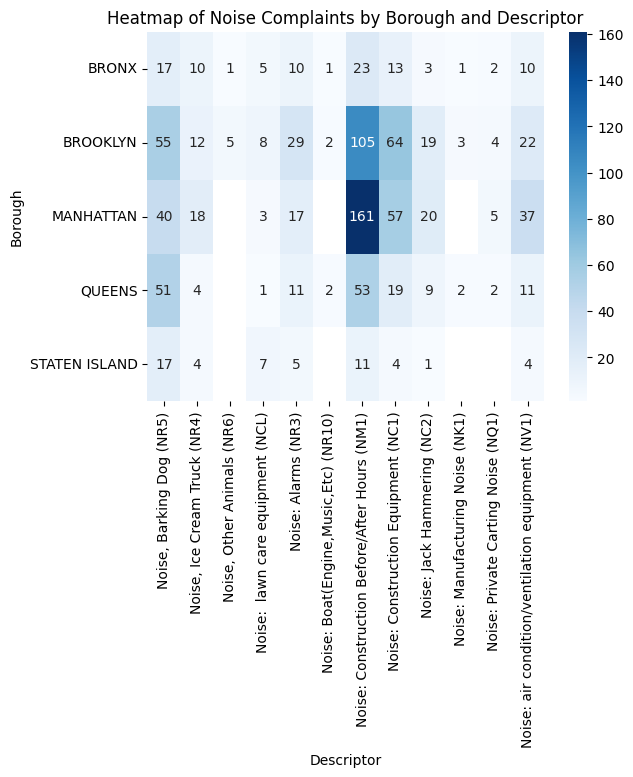

In [153]:
borough_vs_descriptor_heatmap = df.groupby(['borough', 'descriptor']).size().unstack()
sns.heatmap(borough_vs_descriptor_heatmap, annot=True, cmap='Blues', fmt='g')
plt.title('Heatmap of Noise Complaints by Borough and Descriptor')
plt.xlabel('Descriptor')
plt.ylabel('Borough')
plt.show()

Heatmap showing categories noise complaints by each of the 5 bouroughs in New York City by their degrees.

The heatmap shows that Manhattan's degree of Noise complaint by Construction before/after hours is the highest with 161

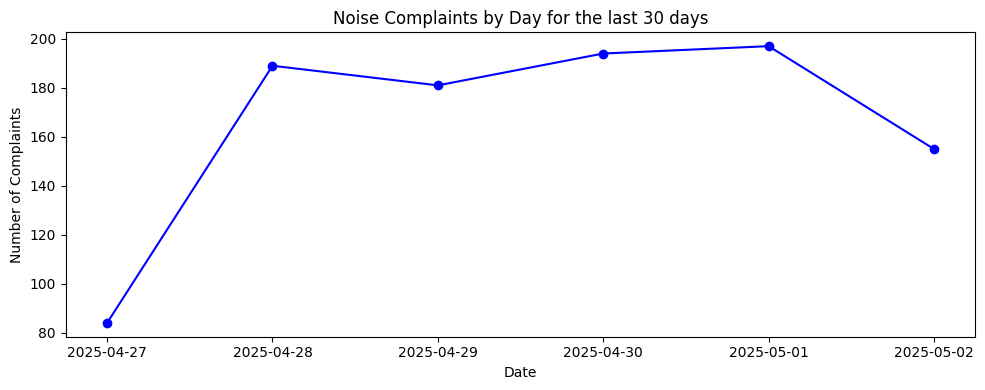

In [154]:
plt.figure(figsize=(10, 4))

df['created_date'] = pd.to_datetime(df['created_date'])
daily_counts = df['created_date'].dt.date.value_counts().sort_index()
daily_counts.plot(kind='line', marker='o', color='blue')
plt.title('Noise Complaints by Day for the last 30 days')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.tight_layout()
plt.show()

Noise complaint trend line for the past 30 days across  the 5 boroughs for easy daily observation and analysis.

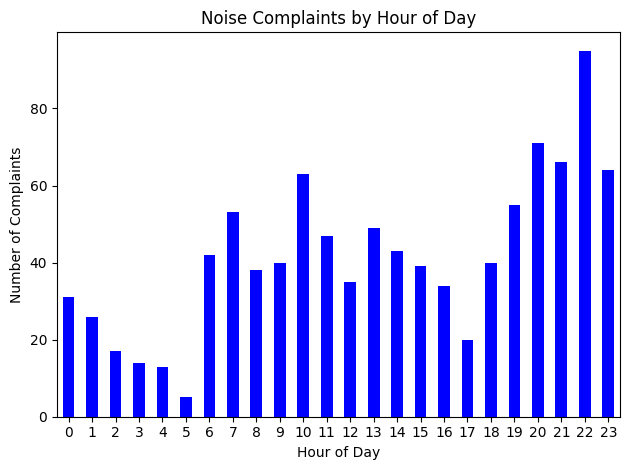

In [155]:
plt.figure()

hourly_counts = df['created_date'].dt.hour.value_counts().sort_index()
hourly_counts.plot(kind='bar', color='blue')
plt.title('Noise Complaints by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This hourly bar chart of Noise complaint by hours of the day shows that most of the complaints tend to peak during late evenings/nights (10pm) and are least between 3am to 5am on average.